In [46]:
import zipfile

dataset_path = "Boston2019.zip"
with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall("Boston2019")

In [47]:
import pandas as pd
import sqlite3

# Store DataFrame in SQL database
dataset = pd.read_csv("Boston2019/Dataset-Boston-2019.csv")  # Adjust file path
print(dataset.head())  # Display first few rows

# Create a connection to SQLite database (creates a new file if it doesn't exist)
db = sqlite3.connect(":memory:")

df.to_sql("Participants", db, if_exists="replace", index=False)

# Execute query
cursor = db.cursor()

# query = '''SELECT Age, COUNT(Age) FROM Participants GROUP BY Age HAVING Age > 77'''
# cursor.execute(query)
#
# participantsOver60 = cursor.fetchall()
# for participant in participantsOver60:
#     print(participant)


   Rank_Tot  Age Gender   Country Result_hr  Result_sec  Rank_Gender  \
0         1   30      M     Kenya   2:07:57        7677            1   
1         2   29      M  Ethiopia   2:07:59        7679            2   
2         3   34      M     Kenya   2:08:07        7687            3   
3         4   32      M     Kenya   2:08:54        7734            4   
4         5   26      M     Kenya   2:08:55        7735            5   

  Country_code  
0          KEN  
1          ETH  
2          KEN  
3          KEN  
4          KEN  


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

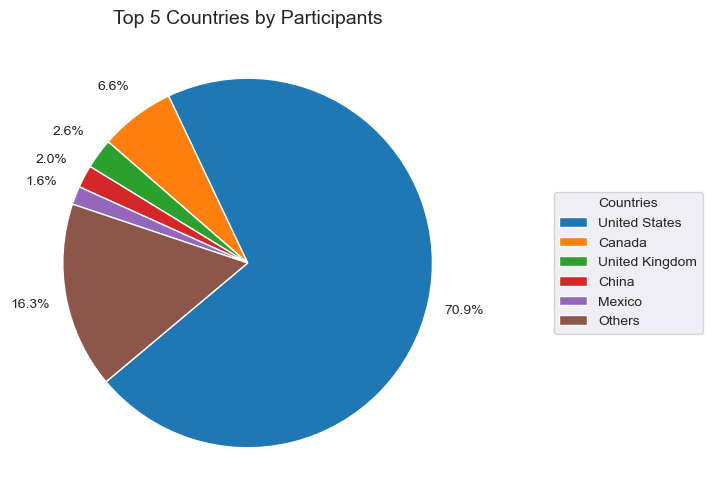

In [49]:
query = '''SELECT Country, COUNT(*) FROM Participants GROUP BY Country ORDER BY COUNT(*) DESC'''
cursor.execute(query)
countriesData = cursor.fetchall()

countries = []
countriesCount = []

for country in countriesData:
    countries.append(country[0])
    countriesCount.append(country[1])


# Take the first 5 countries and add the rest as "Others"
top5Count = countriesCount[:5]
top5Countries = countries[:5]
othersCount = sum(countriesCount[5:])
top5Count.append(othersCount)
top5Countries.append("Others")

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    top5Count,
    autopct='%1.1f%%',
    pctdistance=1.2,
    startangle=220,
)

# Add Legend
plt.legend(
    title="Countries",
    loc="center right",
    labels=top5Countries,
    bbox_to_anchor=(1, 0, 0.5, 1),
)

# Add a title
plt.title("Top 5 Countries by Participants", fontsize=14)

# Show chart
plt.show()

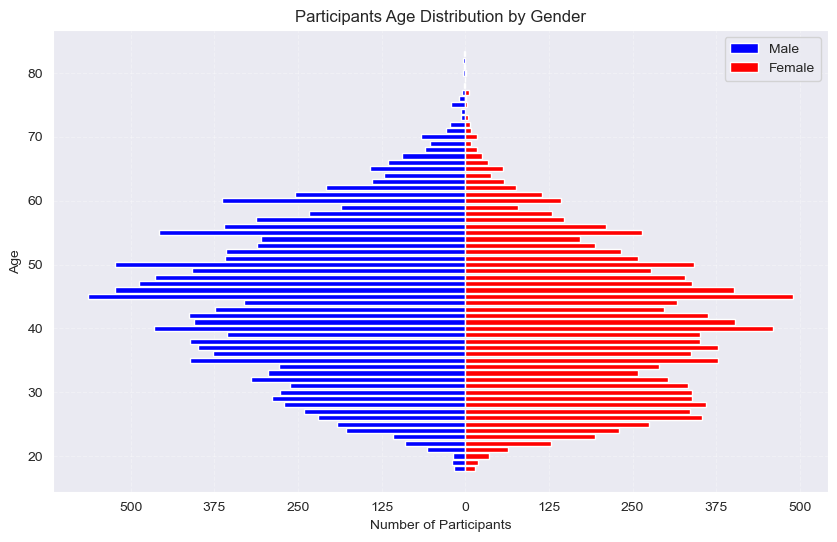

In [50]:
query = '''SELECT Age, COUNT(Age) FROM Participants WHERE Gender='M' GROUP BY Age ORDER BY COUNT(Age) DESC'''
cursor.execute(query)
maleAgeData = cursor.fetchall()

femaleQuery = '''SELECT Age, COUNT(Age) FROM Participants WHERE Gender = 'F' GROUP BY Age ORDER BY COUNT(Age) DESC'''
cursor.execute(femaleQuery)
femaleAgeData = cursor.fetchall()


maleAgeLabels = []
maleAgeCount = []
femaleAgeLabels = []
femaleAgeCount = []

for femaleAge in femaleAgeData:
    femaleAgeLabels.append(femaleAge[0])
    femaleAgeCount.append(femaleAge[1])


for maleAge in maleAgeData:
    maleAgeLabels.append(maleAge[0])
    maleAgeCount.append(-maleAge[1])


fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(linestyle='--', alpha=0.3, zorder=0)
ax.barh(maleAgeLabels, maleAgeCount, color='blue', label='Male', align='center', zorder=3)
ax.barh(femaleAgeLabels, femaleAgeCount, color='red', label='Female', align='center', zorder=3)

# Labels and title
ax.set_xlabel("Number of Participants")
ax.set_ylabel("Age")
ax.set_title("Participants Age Distribution by Gender")

# Define the maximum absolute value between male and female counts for symmetry
max_count = 500
# Generate symmetric tick positions for both left and right sides
xticks = np.linspace(-max_count, max_count, num=9)  # Adjust `num` for more or fewer ticks
# Set the tick positions
ax.set_xticks(xticks)
# Convert to absolute values for display, keeping 0 in the center
ax.set_xticklabels([abs(int(x)) for x in xticks])

# Add legend
ax.legend()

# Show the plot
plt.show()

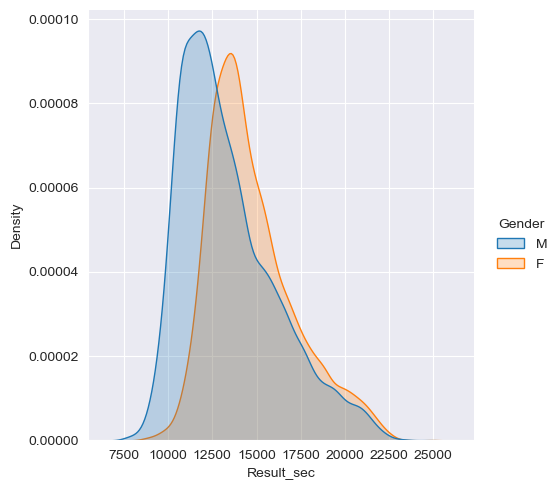

In [51]:
sns.set_style("darkgrid")

sns.displot(dataset, x="Result_sec", hue="Gender", kind="kde", fill=True)